<font size=6><b>Lec00. Ta-Lib

ref : https://github.com/TA-Lib/ta-lib-python<br>
**Function List**
<pre>
Overlap Studies
Momentum Indicators
Volume Indicators
Volatility Indicators
Price Transform
Cycle Indicators
Pattern Recognition
Statistic Functions
Math Transform
Math Operators


In [16]:
import talib.abstract as ta
from pandas_datareader import data
import FinanceDataReader as fdr
from talib import MA_Type
import numpy as np

In [ ]:
df = data.DataReader('215600.KQ','yahoo', '2017-01-01', '2018-01-31')\
    .dropna(how='all')\
    .rename(columns=lambda col:col.lower()) # 컬럼 이름을 소문자로 변경
df.head()

## 이동평균(MA: Moving Average)
- ref : https://bosungs2y.tistory.com/261
- 보통 과거 <b>(단기)5,10,20/(중장기)60,120/(장기)200,250 일</b> 동안의 이평 계산
- 묶는 일수가 커질수록 변동폭이 완만해짐
- 추세 판단에 사용
- <b>이평선과 현재 주가의 괴리가 얼마나 벌어져 있는가</b>로 추세적 매매를 결정
    - 당일 종가가 이동평균선(5일,10일,20일,120일평균값) 위에 있으면 상승추세로 판단 (가격이 평균값보다 높으므로)
*******
- 저항선과 지지선
    - <font color='red'><b>저항선</b></font> : 주가가 일정 수준까지 올라가면 더 이상 올라가지 못하는 지점을 선으로 이은 것
    - <font color='red'><b>지지선</b></font> : 주가가 일정 수준으로 내려오면 더 이상 내려가지 않으려고 하는 저점을 선으로 이은 것
    - 기준은 매매자에 따라 다름
    - <font color='red'><b>거래량이 받춰줘야만</font></b> 저항/지지선을 뚫을 수 있다 -> 반드시 같이 봐야 함
        - 거래량 그래프 : 파란색 / 빨간색 : 단발성
*******
- <b>Gold Cross</b> : 단기이평이 중장기이평 <b>상향돌파</b>시 --> <font color='red'><b>상승 추세</font></b>로 볼 수 있음
- <b>Dead Cross</b> : 단기이평이 중장기이평 <b>하향돌파</b>시 --> <font color='blue'><b>하락 추세</font></b>로 볼 수 있음
<table>
    <tr>
    <td>
        <img width= 300 src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbZJhCZ%2FbtqEQtjku9A%2F3bf5UtlJx1GdNhc5GEGTbK%2Fimg.png">
    </td>
    <td>
        <img width= 300 src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcq0xtv%2FbtqESH73Q2Q%2FFXLcc8nOgVDf65My4vntlk%2Fimg.png">
    </td>
    </tr>
</table>
*******
- <b>정배열</b> : 장기선 < 중기선 < 단기선 -> <font color='red'><b>강한 상승</font></b>추세 == <font color='red'><b>매수</font></b>신호
- <b>역배열</b> : 장기선 > 중시건 > 단기선 -> <font color='blue'><b>강한 하락</font></b>추세 == <font color='blue'><b>매도</font></b>신호
<table>
    <tr>
    <td>
        <img width= 250 src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcAFcnK%2FbtqESHAezz0%2FwZopF5X3Vmu09TvyQaH2T0%2Fimg.png">
    </td>
    <td>
        <img width= 250 src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbif35j%2FbtqESgwjSOb%2FpxwbKXiC8SWeQPmeacf1Ek%2Fimg.png">
    </td>
    </tr>
</table>
*******
- 캔들스틱이 이평선 보다 올라와있어야 강한 상승(1분봉보기)
- 캔들스틱이 이평선을 타고 내려오며 20일선이 뚫리면 강한 하락(5분봉보기)
*******
- 종류<br>
    <b>1. 단순이동평균(SMA)</b><br>
    <b>2. 가중이동평균(WMA)</b><br>
        - <b>현재의 값 데이터에 더 가중치</b>를 두고 과거의 값에는 보다 적은 가중치를 두어, 현재의 추세를 더욱 잘 반영하도록 함<br>
        - 특정기간내의 데이터만 반영  
    <b>3. 지수이동평균(EMA)</b><br>
        - 가중이평과 달리 과거의 데이터에 가중치 조금이라도 적용(가중이평은 과거의 데이터에 가중치를 적용하지 않음)<br>
        - SMA보다 작은 값을 가짐 -> <b>선행지표</b>가 될 수 있음<br>
        - 단기 변동성 파악에 좋음<br>

In [18]:
%timeit ta.MA(df, timeperiod=5)
ta.MA(df, timeperiod=5).head()

71.3 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Date
2017-01-02        NaN
2017-01-13        NaN
2017-01-17        NaN
2017-01-23        NaN
2017-02-07    11520.0
dtype: float64

In [14]:
%timeit df['close'].rolling(window=5).mean()
df['close'].rolling(window=5).mean().tail() 

179 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Date
2018-01-25    108820.0
2018-01-26    110220.0
2018-01-29    111400.0
2018-01-30    110420.0
2018-01-31    109500.0
Name: close, dtype: float64

## 단순이동평균(SMA)  == MA

In [21]:
ta.SMA(df).tail()

Date
2018-01-25    95876.666667
2018-01-26    96553.333333
2018-01-29    97286.666667
2018-01-30    97986.666667
2018-01-31    98686.666667
dtype: float64

In [31]:
ta.EMA(df).tail()

Date
2018-01-25     99539.795872
2018-01-26    100214.647752
2018-01-29    100845.960800
2018-01-30    101442.995587
2018-01-31    101730.544259
dtype: float64

In [32]:
ta.WMA(df).tail()

Date
2018-01-25    100753.548387
2018-01-26    101664.731183
2018-01-29    102532.258065
2018-01-30    103358.924731
2018-01-31    103869.462366
dtype: float64

## MACD(Moving Average Convergence/Divergence)
- 단기 이동평균선과 장기 이동평균선 <font color='red'><b>수렴과 확산</b></font> 과정 지속
    - 수렴 == 횡보
    - 확장(발산) == 변동성 크다
- signal과 MACD 곡선이 크로스 되는 순간이 매수/매도 신호
    - 기본값 : 12일(단기), 26일(장기), 9일(signal)
    - <font color='red'><b>signal 곡선 = 9일 MACD 이동평균선</b></font>
    - <font color='red'><b>MACD 곡선 = (단기 이동평균- 장기이동평균)</b></font>
    - <b>Golden cross</b> : MACD 곡선이 signal 곡선 <font color='red'><b>상향 돌파</b></font> == <font color='red'><b>매수</b></font>신호
    - <b>Dead cross</b> : MACD 곡선이 signal 곡선 <font color='blue'><b>하향 돌파</b></font> == <font color='blue'><b>매도</b></font>신호
    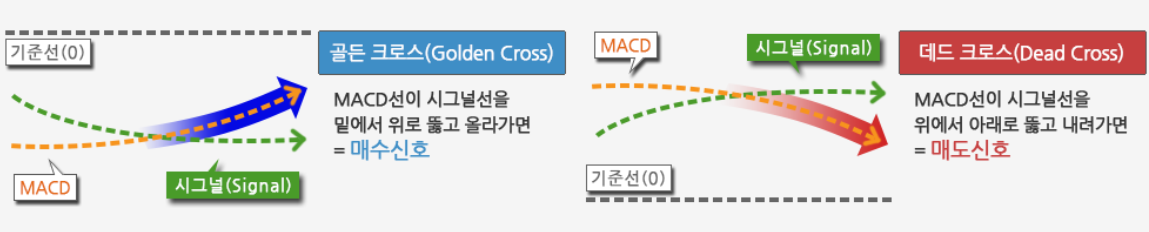
    - 교차점의 <b>기울기가 가파를수록</b> 신뢰도가 높음
- MACD(선행) - 스토캐스틱(후행)

In [47]:
macd, macdsignal, macdhist = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
print(macd[-3:], macdsignal[-3:], macdhist[-3:])

[4838.79595364 4739.15600131 4272.04030075] [4233.05922422 4334.27857964 4321.83092386] [605.73672942 404.87742167 -49.79062311]


In [26]:
# help('ta.SMA')

No Python documentation found for 'ta.SMA'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [45]:
close_arr = np.asarray(df["close"])
high_arr  = np.asarray(df["high"])
low_arr   = np.asarray(df["low"])

## BBAND(볼린저밴드)

In [44]:
#볼린저 계산                                      high편차 low편차
upper, middle, low = ta._ta_lib.BBANDS(close_arr, 20, 2, 2, matype=MA_Type.SMA)
print(upper[-3:])
print(middle[-3:])
print(low[-3:] )

[115769.29211622 116437.62635222 116591.26932199]
[103815. 104195. 104340.]
[91860.70788378 91952.37364778 92088.73067801]


## RSI 
- ref : https://www.nanumtrading.com/fx-%eb%b0%b0%ec%9a%b0%ea%b8%b0/%ec%b0%a8%ed%8a%b8-%eb%b3%b4%ec%a1%b0%ec%a7%80%ed%91%9c-%ec%9d%b4%ed%95%b4/03-rsi/
- 현재 가격의 상승 압력과 하락 압력간의 상대적인 강도를 나타내는 기술적 지표
    - 가격의 상승과 하락 추세에서 상승 폭과 하락 폭 계산하여 그 강도를 백분율로 계산
    - 과매수와 과매도 상태 판단에 용이
- RSI = ((n일 동안의 종가 상승 분 평균(AU))/(n일 동안의 종가 상승 분 평균 + n일 동안의 종가 하락분 평균(AD))) * 100
    - RSI 30%으로 떨어지면 초과매도 국면 == 매수
    - RSI 70%를 넘어서면 초과매수 국면 == 매도 -> 클수록 상승세

## 기타

In [ ]:
ta._ta_lib.RSI(close_arr, 14)
ta._ta_lib.CCI(high_arr, low_arr, close_arr, 14)
ta._ta_lib.WILLR(high_arr, low_arr, close_arr, 14)
ta._ta_lib.VAR(close_arr, 5, 1)
ta._ta_lib.ADX(high_arr, low_arr, close_arr, 14)
ta._ta_lib.PLUS_DI(high_arr, low_arr, close_arr, 14)
ta._ta_lib.PLUS_DM(high_arr, low_arr, 14)
ta._ta_lib.ATR(high_arr, low_arr, close_arr, 30)

## 실습

- 4월 한달 삼성주가
- EMA WMA SMA

### data load

In [10]:
from pykrx import stock
df = stock.get_market_ohlcv("20230401", "20230430", "005930")
df.head(3)

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2023-04-03,64000,64000,63000,63100,11973133,757289145500,-1.41
2023-04-04,63400,63800,62800,63600,11120514,706088571400,0.79
2023-04-05,63700,64000,63400,63900,9176149,584822515500,0.47


### SMA

In [22]:
SMA=df['종가'].rolling(5).mean()
SMA

날짜
2023-04-03        NaN
2023-04-04        NaN
2023-04-05        NaN
2023-04-06        NaN
2023-04-07    63580.0
2023-04-10    64100.0
2023-04-11    64560.0
2023-04-12    64980.0
2023-04-13    65740.0
2023-04-14    65760.0
2023-04-17    65680.0
2023-04-18    65620.0
2023-04-19    65520.0
2023-04-20    65360.0
2023-04-21    65480.0
2023-04-24    65460.0
2023-04-25    65060.0
2023-04-26    64780.0
2023-04-27    64640.0
2023-04-28    64600.0
Name: 종가, dtype: float64

In [23]:
ta_SMA=ta.SMA(df,timeperiod=5, price='종가')
ta_SMA

날짜
2023-04-03        NaN
2023-04-04        NaN
2023-04-05        NaN
2023-04-06        NaN
2023-04-07    63580.0
2023-04-10    64100.0
2023-04-11    64560.0
2023-04-12    64980.0
2023-04-13    65740.0
2023-04-14    65760.0
2023-04-17    65680.0
2023-04-18    65620.0
2023-04-19    65520.0
2023-04-20    65360.0
2023-04-21    65480.0
2023-04-24    65460.0
2023-04-25    65060.0
2023-04-26    64780.0
2023-04-27    64640.0
2023-04-28    64600.0
dtype: float64

### WMA
- sum(가중치*가격)/ 가중치의 합

In [64]:
weights=np.arange(1,6)
weights

array([1, 2, 3, 4, 5])

In [67]:
price=df['종가'][1:6]
price

날짜
2023-04-04    63600
2023-04-05    63900
2023-04-06    62300
2023-04-07    65000
2023-04-10    65700
Name: 종가, dtype: int32

In [68]:
price=df['종가'][0:5]
weights=np.arange(1,6)
WMA=np.dot(price,weights)
WMA

956200

In [75]:
WMA_list=[]
window=5
for i in range(len(df[:-(window-1)])):
    price=df['종가'][i:i+5]
    weights=np.arange(1,6)
    WMA=np.dot(price,weights)/np.sum(weights)
    WMA_list.append(WMA)
WMA_list    

[63746.666666666664,
 64453.333333333336,
 65053.333333333336,
 65533.333333333336,
 65906.66666666667,
 65693.33333333333,
 65540.0,
 65513.333333333336,
 65473.333333333336,
 65400.0,
 65513.333333333336,
 65420.0,
 64800.0,
 64480.0,
 64420.0,
 64706.666666666664]

In [42]:
ta_WMA=ta.WMA(df,timeperiod=5, price='종가')
ta_WMA

날짜
2023-04-03             NaN
2023-04-04             NaN
2023-04-05             NaN
2023-04-06             NaN
2023-04-07    63746.666667
2023-04-10    64453.333333
2023-04-11    65053.333333
2023-04-12    65533.333333
2023-04-13    65906.666667
2023-04-14    65693.333333
2023-04-17    65540.000000
2023-04-18    65513.333333
2023-04-19    65473.333333
2023-04-20    65400.000000
2023-04-21    65513.333333
2023-04-24    65420.000000
2023-04-25    64800.000000
2023-04-26    64480.000000
2023-04-27    64420.000000
2023-04-28    64706.666667
dtype: float64

### EMA

In [77]:
df['종가'].ewm(span=5,adjust=False).mean() # adjust= True : 지수평활 적용

날짜
2023-04-03    63100.000000
2023-04-04    63266.666667
2023-04-05    63477.777778
2023-04-06    63085.185185
2023-04-07    63723.456790
2023-04-10    64382.304527
2023-04-11    64888.203018
2023-04-12    65258.802012
2023-04-13    65539.201341
2023-04-14    65392.800894
2023-04-17    65361.867263
2023-04-18    65441.244842
2023-04-19    65460.829895
2023-04-20    65407.219930
2023-04-21    65504.813286
2023-04-24    65403.208858
2023-04-25    64802.139238
2023-04-26    64568.092826
2023-04-27    64578.728550
2023-04-28    64885.819034
Name: 종가, dtype: float64

In [73]:
ta_EMA=ta.EMA(df,timeperiod=5, price='종가')
ta_EMA

날짜
2023-04-03             NaN
2023-04-04             NaN
2023-04-05             NaN
2023-04-06             NaN
2023-04-07    63580.000000
2023-04-10    64286.666667
2023-04-11    64824.444444
2023-04-12    65216.296296
2023-04-13    65510.864198
2023-04-14    65373.909465
2023-04-17    65349.272977
2023-04-18    65432.848651
2023-04-19    65455.232434
2023-04-20    65403.488289
2023-04-21    65502.325526
2023-04-24    65401.550351
2023-04-25    64801.033567
2023-04-26    64567.355711
2023-04-27    64578.237141
2023-04-28    64885.491427
dtype: float64

In [44]:
# 금일의 지수이동평균 = (EMA[i] * EP) + (EMA[i-1] * (1 - EP))
# EP = 2 / 기간 + 1)
EP = 2 / (len(df) + 1)
for i in range(len(df)):   
    EMA = (df['종가'][i] * EP) + (df['종가'].rolling(5).mean() * (1 - EP))
EMA